In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numba.core.errors import NumbaWarning
warnings.filterwarnings("ignore", category=NumbaWarning)

from scipy.optimize import minimize
from aeons.covariance import logX_mu, logX_covinv_chol, points_at_iteration, X_mu, X_Sigma, X_Sigmainv, data_at_iteration
from aeons.true_distribution import generate_Xs
from aeons.bayes import logPr_bayes, logPr_gaussian, minimise_ls, minimise_bayes, minimise_gaussian
from aeons.likelihoods import likelihood, linear_like, quad_like, log_like, simple_like, middle_like, full_like
linear, quad, log = linear_like(), quad_like(), log_like()
simple, middle, full = simple_like(), middle_like(), full_like()

In [114]:
nk = 500 * np.ones(2000)
mean_X = X_mu(nk)
covinv_X = X_Sigmainv(nk)
X = generate_Xs(nk)
theta_true = np.array([1, 10, 1])
y = full.func(X, theta_true)
theta_max = minimise_bayes(y, full, mean_X, covinv_X, theta_true).x
from aeons.hessian import hess_autograd
H_autograd = hess_autograd(y, mean_X, covinv_X, theta_max)
np.linalg.eigvals(H_autograd)

array([-5.48191671e+07, -3.37525261e+04, -2.88665933e+00])

In [106]:
from aeons.hessian import hess
H_analytic = hess(np.array(y), np.array(mean_X), np.array(covinv_X), theta_max)
np.linalg.eigvals(H_analytic)

array([-3.70846094e+07, -4.09083860e+04,  3.12221544e+02])

In [115]:
cov_theta = np.linalg.inv(-H_autograd)
cov_analytic = np.linalg.inv(-H_analytic)

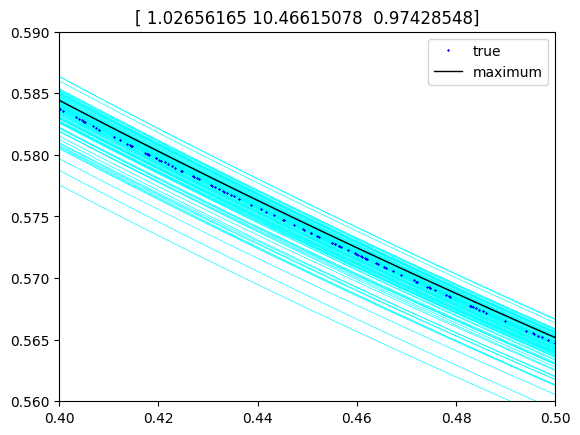

In [116]:
for i in range(100):
    theta = np.random.multivariate_normal(theta_max, cov_theta)
    X_b = full.inverse(y, theta)
    plt.plot(X_b, y, lw=.5, color='cyan')
plt.plot(X, y, 'x', ms=1, color='blue', label='true')
plt.plot(full.inverse(y, theta_max), y, lw=1, color='black', label='maximum')
plt.title(theta_max)
plt.xlim(0.4, 0.5)
plt.ylim(0.56, 0.59)
plt.legend();

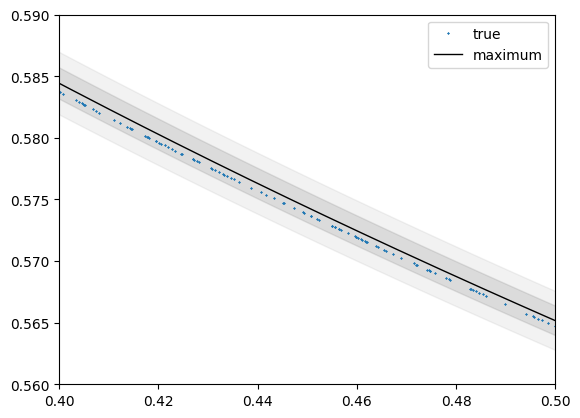

In [118]:
samples = 1000
Xarrays = np.zeros((samples, len(y)))
for i in range(samples):
    theta = np.random.multivariate_normal(theta_max, cov_theta)
    X_b = full.inverse(y, theta)
    Xarrays[i] = X_b
X_std = Xarrays.T.std(axis=1)
X_mean = Xarrays.T.mean(axis=1)

X_b = full.inverse(y, theta_max)
plt.plot(X, y, 'x', ms=1, label='true')
plt.plot(X_b, y, lw=1, color='black', label='maximum')
# plt.plot(X_mean, y, lw=1, color='yellow', label='mean')
plt.fill_betweenx(y, X_b - 2*X_std, X_b + 2*X_std, color='gray', alpha=0.1)
plt.fill_betweenx(y, X_b - X_std, X_b + X_std, color='gray', alpha=0.2)
plt.xlim(0.4, 0.5)
plt.ylim(0.56, 0.59)
plt.legend();